In [1]:
#import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('all lib imported')

all lib imported


In [2]:
#import loan data
data = pd.read_csv('https://raw.githubusercontent.com/shawnkan/DeepLearn_simp/main/Proj1/loan_data.csv')

In [3]:
'''
https://raw.githubusercontent.com/shawnkan/DeepLearn_simp/main/Proj1/input.csv

https://raw.githubusercontent.com/shawnkan/DeepLearn_simp/main/Proj1/output.csv
'''

'\nhttps://raw.githubusercontent.com/shawnkan/DeepLearn_simp/main/Proj1/input.csv\n\nhttps://raw.githubusercontent.com/shawnkan/DeepLearn_simp/main/Proj1/output.csv\n'

In [4]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
#check if fully paid vs not fully paid
data['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

<Axes: title={'center': 'Not Fully Paid vs Fully Paid'}, xlabel='not.fully.paid'>

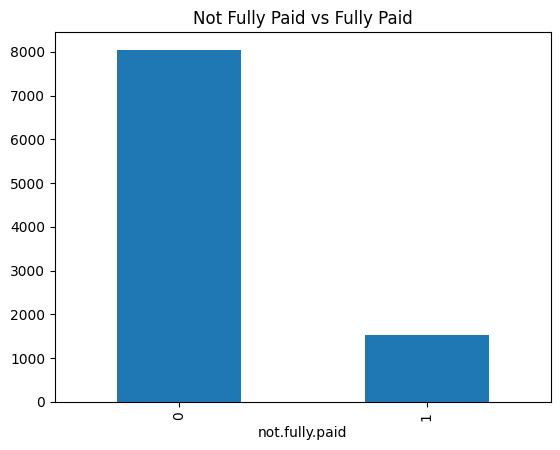

In [6]:
data['not.fully.paid'].value_counts().plot(kind='bar', title='Not Fully Paid vs Fully Paid')

<ipython-input-7-839f93cc0b79>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['purpose'], palette='Set2')


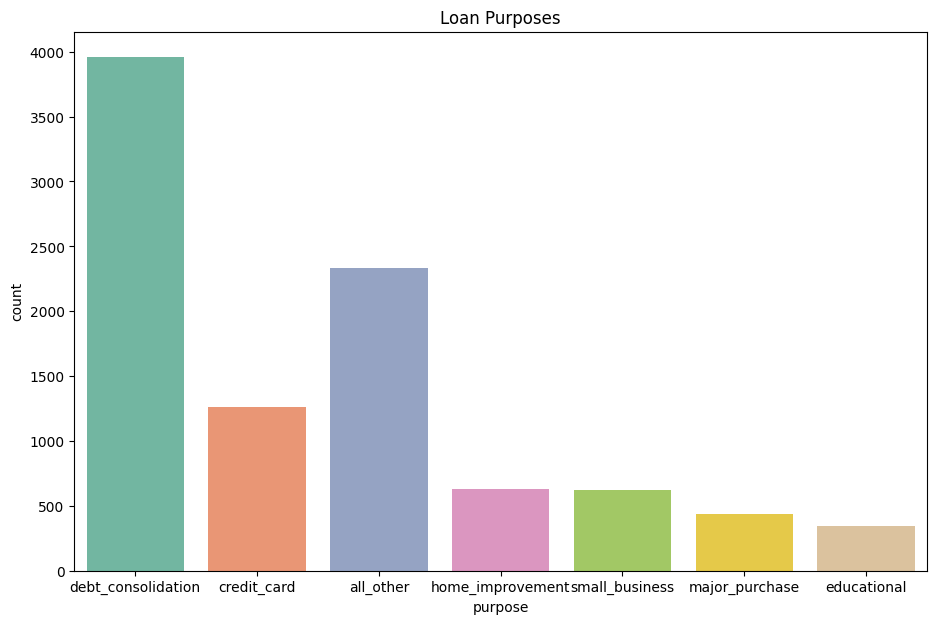

In [7]:
# purposes of loans
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'], palette='Set2')
plt.title('Loan Purposes')
plt.show()

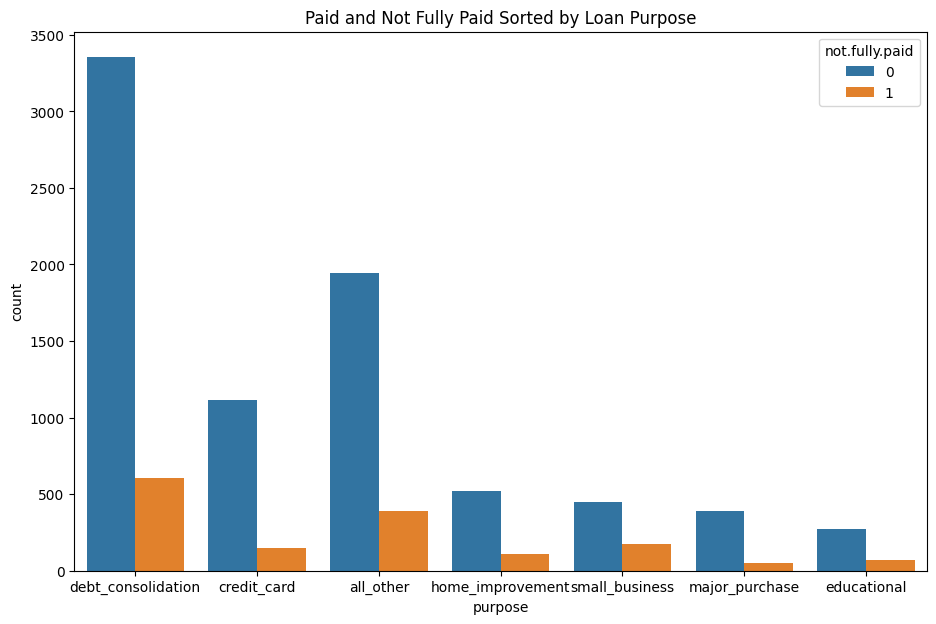

In [8]:
# purpose vs fully paid/not fully paid
plt.figure(figsize=(11,7))
sns.countplot(x=data['purpose'],hue='not.fully.paid',data=data)
plt.title('Paid and Not Fully Paid Sorted by Loan Purpose')
plt.show()

# Handling Imbalanced Data

In [9]:
not_fully_paid_0=data[data['not.fully.paid']==0]
not_fully_paid_1=data[data['not.fully.paid']==1]

In [10]:
not_fully_paid_0.shape

(8045, 14)

In [11]:
not_fully_paid_1.shape

(1533, 14)

In [12]:
# resample to make sure both classes are balanced
# upsample minor class to major class
from sklearn.utils import resample
upsampled_data = resample(not_fully_paid_1,replace=True,n_samples=8045)
new_df = pd.concat([not_fully_paid_0,upsampled_data])

In [13]:
#reshuffling of the data to ensure distributed
# shuffle
from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [14]:
new_df.shape

(16090, 14)

In [15]:
new_df['not.fully.paid'].value_counts()

not.fully.paid
1    8045
0    8045
Name: count, dtype: int64

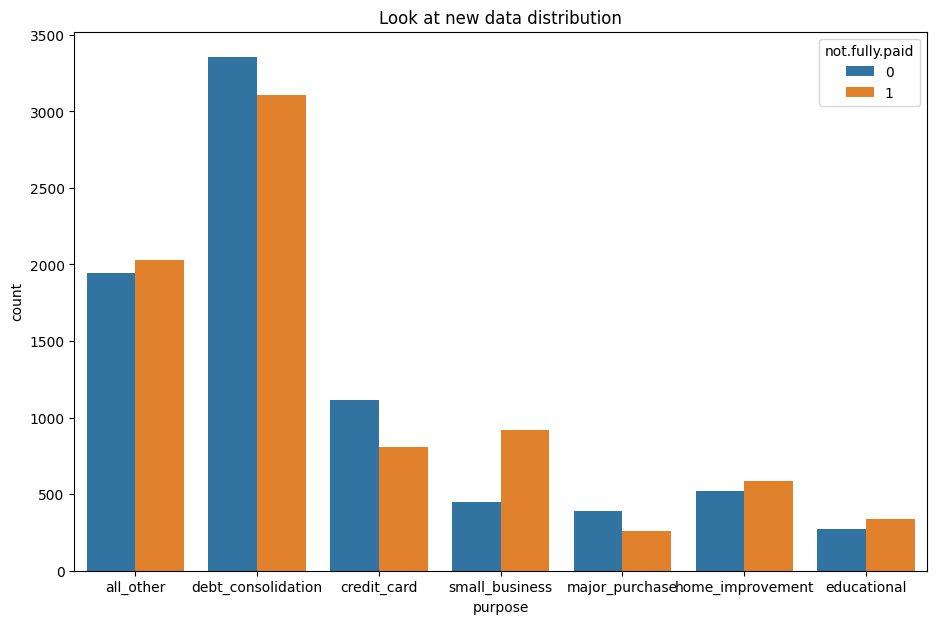

In [16]:
# purpose vs fully paid/not fully paid
plt.figure(figsize=(11,7))
sns.countplot(x=new_df['purpose'],hue='not.fully.paid',data=new_df)
plt.title('Look at new data distribution')
plt.show()

# Feature Transformation

In [17]:
new_df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [18]:
# apply encoding to convert label data to numeric data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
#in case got more columns, use a for loop to convert every column
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=le.fit_transform(new_df[i])

In [20]:
new_df['purpose'].value_counts()

purpose
2    6460
0    3973
1    1922
6    1367
4    1110
5     645
3     613
Name: count, dtype: int64

# Feature Engineering

In [21]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
6133,1,0,0.1774,734.83,10.950807,6.84,667,1830.000000,1820,42.3,2,1,0,1
1873,1,2,0.1126,315.49,11.097410,18.31,722,4110.041667,39660,46.5,0,0,0,0
9384,0,0,0.1565,139.95,10.635855,9.95,727,3480.041667,2822,28.2,9,0,0,1
7933,0,0,0.1028,181.44,8.517193,0.00,682,238.958333,0,0.0,3,0,0,1
5237,1,1,0.0894,444.81,10.799576,14.33,762,3660.000000,11984,38.5,1,0,0,0


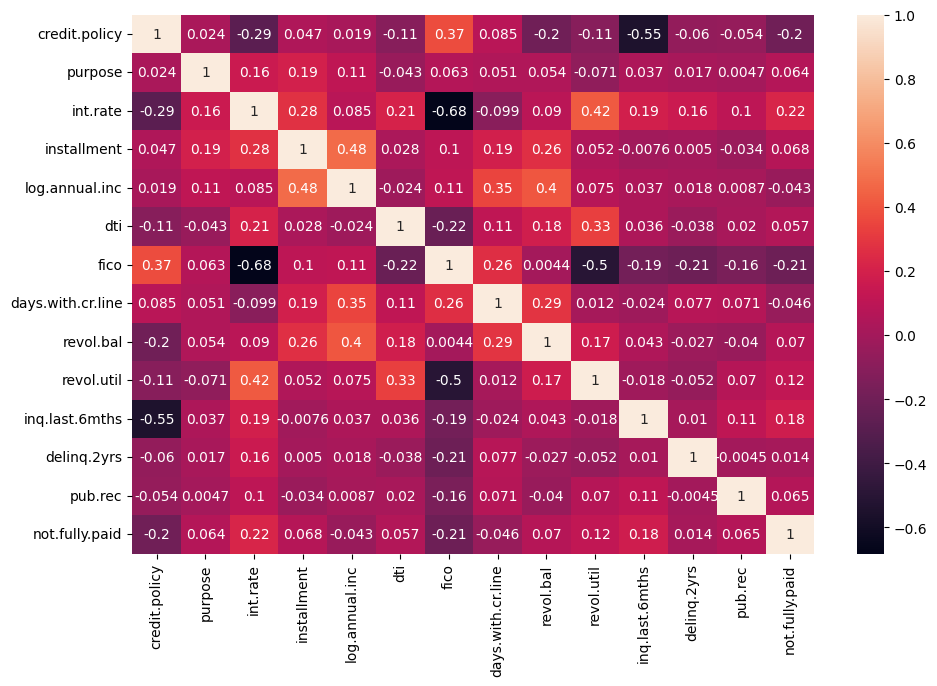

In [22]:
#heatmap to show the correlations
plt.figure(figsize=(11,7))
sns.heatmap(new_df.corr(),annot=True)
plt.show()

In [23]:
# see the correlation with not fully paid
new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.219373
fico                 0.210046
credit.policy        0.201100
inq.last.6mths       0.175080
revol.util           0.115878
revol.bal            0.070040
installment          0.068425
pub.rec              0.065165
purpose              0.064387
dti                  0.057417
days.with.cr.line    0.046488
log.annual.inc       0.042595
delinq.2yrs          0.013570
Name: not.fully.paid, dtype: float64

In [24]:
new_df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [25]:
#if we select a threshold of 0.05, anything above log.annual.inc we should include

#prepare the data
X=new_df[['credit.policy','purpose','int.rate',
          'installment','log.annual.inc','fico',
          'revol.bal','revol.util','inq.last.6mths',
          'pub.rec']]

In [26]:
X.shape

(16090, 10)

In [27]:
y= new_df[['not.fully.paid']]

In [28]:
#create train set & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
#Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

print('imported')

imported


In [31]:
# Create Architecture
# Create a ANN with 2 hidden layers, first hidden layer 19 units, second layer 10 neuron , activation relu
# dropout .25, batchnormalization

model =Sequential()

#first hidden layer
model.add(Dense(19,activation='relu', input_shape=(10,)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

#second hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

#third hidden layer
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

#output layer
model.add(Dense(1,activation='sigmoid'))



In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                209       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 batch_normalization (Batch  (None, 19)                76        
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 10)                40        
 chNormalization)                                       

In [33]:
#compile the model
#can try adam for loss
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
#Early Stopping
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0.01,
                           mode='min',
                           verbose = 1,
                           patience = 10)

In [35]:
history= model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(X_test,y_test),
                    callbacks = [early_stop])

Epoch 1/50
51/51 [==============================] - 5s 20ms/step - loss: 0.7380 - accuracy: 0.5293 - val_loss: 0.6749 - val_accuracy: 0.5966
Epoch 2/50
51/51 [==============================] - 1s 10ms/step - loss: 0.7097 - accuracy: 0.5444 - val_loss: 0.6614 - val_accuracy: 0.6206
Epoch 3/50
51/51 [==============================] - 1s 12ms/step - loss: 0.6980 - accuracy: 0.5479 - val_loss: 0.6556 - val_accuracy: 0.6265
Epoch 4/50
51/51 [==============================] - 1s 11ms/step - loss: 0.6827 - accuracy: 0.5651 - val_loss: 0.6506 - val_accuracy: 0.6318
Epoch 5/50
51/51 [==============================] - 1s 18ms/step - loss: 0.6764 - accuracy: 0.5753 - val_loss: 0.6475 - val_accuracy: 0.6336
Epoch 6/50
51/51 [==============================] - 1s 10ms/step - loss: 0.6761 - accuracy: 0.5720 - val_loss: 0.6447 - val_accuracy: 0.6361
Epoch 7/50
51/51 [==============================] - 1s 14ms/step - loss: 0.6722 - accuracy: 0.5841 - val_loss: 0.6433 - val_accuracy: 0.6349
Epoch 8/50
51

In [36]:
history= model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6112 - val_loss: 0.6350 - val_accuracy: 0.6436
Epoch 2/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6201 - val_loss: 0.6345 - val_accuracy: 0.6423
Epoch 3/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6192 - val_loss: 0.6341 - val_accuracy: 0.6436
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6201 - val_loss: 0.6343 - val_accuracy: 0.6448
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6220 - val_loss: 0.6338 - val_accuracy: 0.6451
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6189 - val_loss: 0.6333 - val_accuracy: 0.6473
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6494 - accuracy: 0.6237 - val_loss: 0.6325 - val_accuracy: 0.6482
Epoch 8/50
51/51 [==

In [37]:
#print accuracy & losss
score_test=model.evaluate(X_test,y_test)

#same whether I introduct early stopping or not
#quite similar with adam and rmsprop

101/101 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6566


In [38]:
# predictions
pred=model.predict(X_test)
pred

101/101 [==============================] - 0s 2ms/step


array([[0.4535795 ],
       [0.41633022],
       [0.45793805],
       ...,
       [0.75480664],
       [0.26285675],
       [0.54428506]], dtype=float32)

In [39]:
predict = (pred>0.5).astype('int')
predict

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predict))

[[ 989  632]
 [ 473 1124]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1621
           1       0.64      0.70      0.67      1597

    accuracy                           0.66      3218
   macro avg       0.66      0.66      0.66      3218
weighted avg       0.66      0.66      0.66      3218

